### Intro Geospatial PYthon

 this website provided data for several storms and hurricanes in the States from 1902 to 2018, so there is a ton of available data for you to work later on. For this tutorial, you will only use the Hurricane Florence data

You will also use the US map geospatial data from the internet. This blog post by Eric Celeste has all kind of boundary data files for US counties and states. The data used in this tutorial is the US States, 5m, GeoJSON file.

In [4]:
# Load all importance packages
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Getting to know GEOJSON file:
# http://eric.clst.org/tech/usgeojson/
country = geopandas.read_file("data/gz_2010_us_040_00_5m.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


In [6]:
type(country)

geopandas.geodataframe.GeoDataFrame

In [7]:
# VChecking the data type of the column containing coordinates: it's GeoSeries.
type(country.geometry)


geopandas.geoseries.GeoSeries

Each object can be used for a different type of physical object such as: Point for building, Line for Street, Polygon for city, and MultiPolygon for country with multiple cities inside. For more information about each Geometric object, read this article: https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects

In [8]:
type(country.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

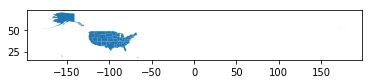

In [9]:
country.plot()

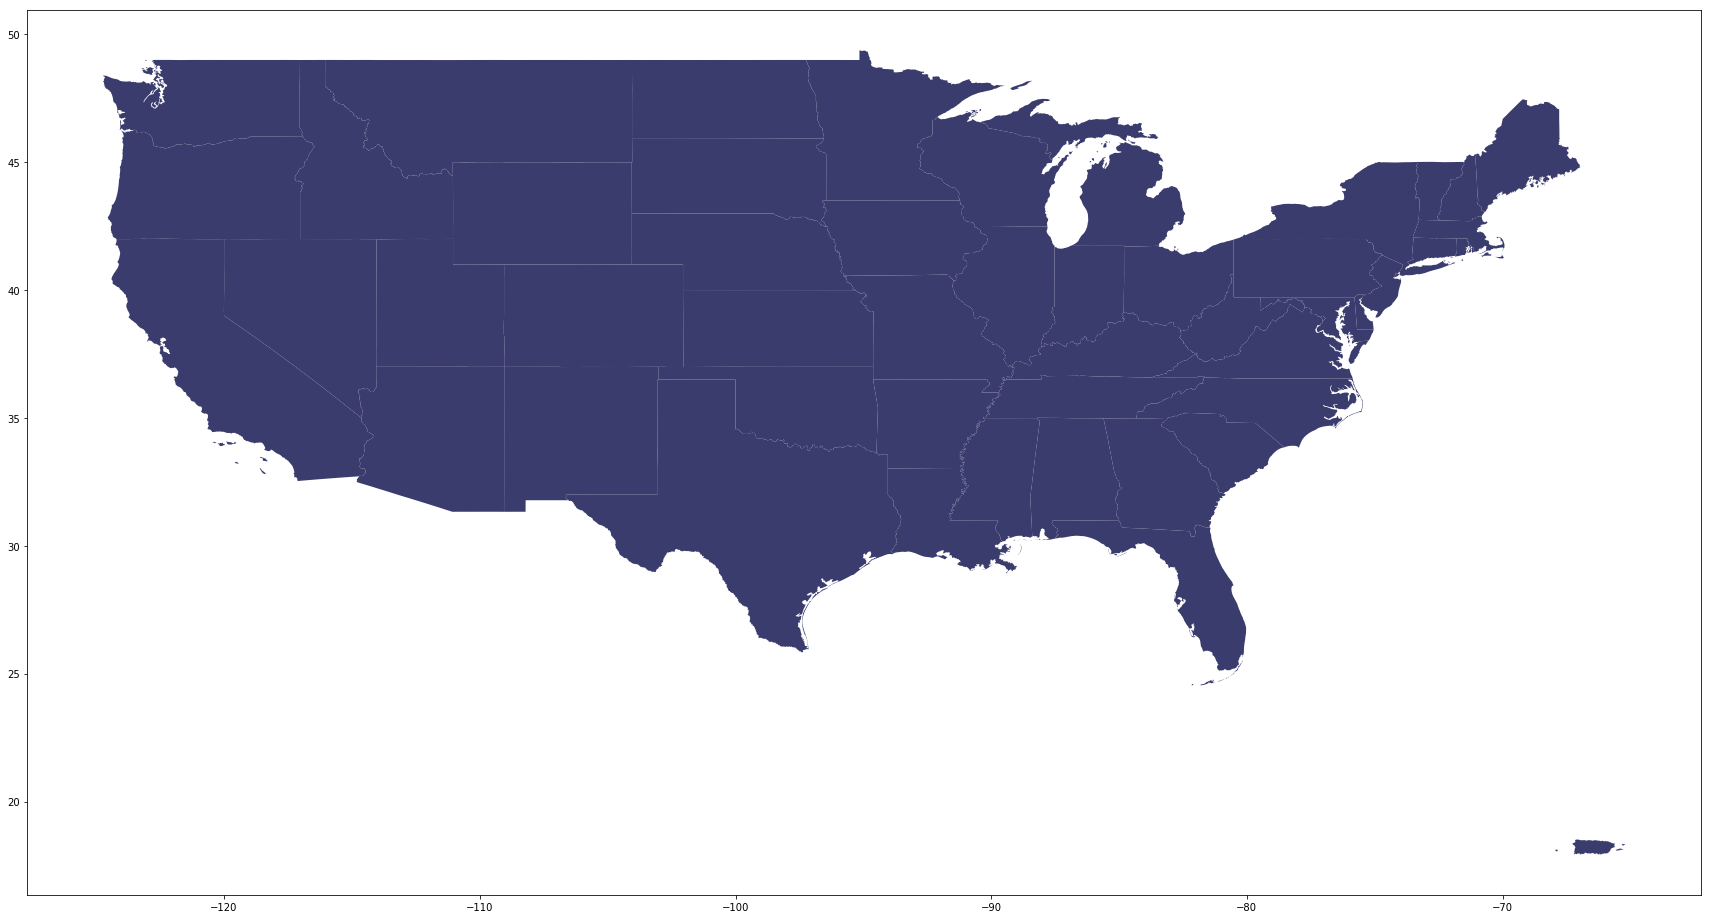

In [10]:
# Exclude Alaska and Hawaii for now
country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,20), color='#3B3C6E');

In [11]:
florence = pd.read_csv('data/florence.csv')
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila
1,1A,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila
2,2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila
3,2A,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven
4,3,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven


In [12]:
florence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
AdvisoryNumber    105 non-null object
Date              105 non-null object
Lat               105 non-null float64
Long              105 non-null float64
Wind              105 non-null int64
Pres              105 non-null int64
Movement          105 non-null object
Type              105 non-null object
Name              105 non-null object
Received          105 non-null object
Forecaster        104 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 9.1+ KB


In [15]:
florence.shape

(105, 11)

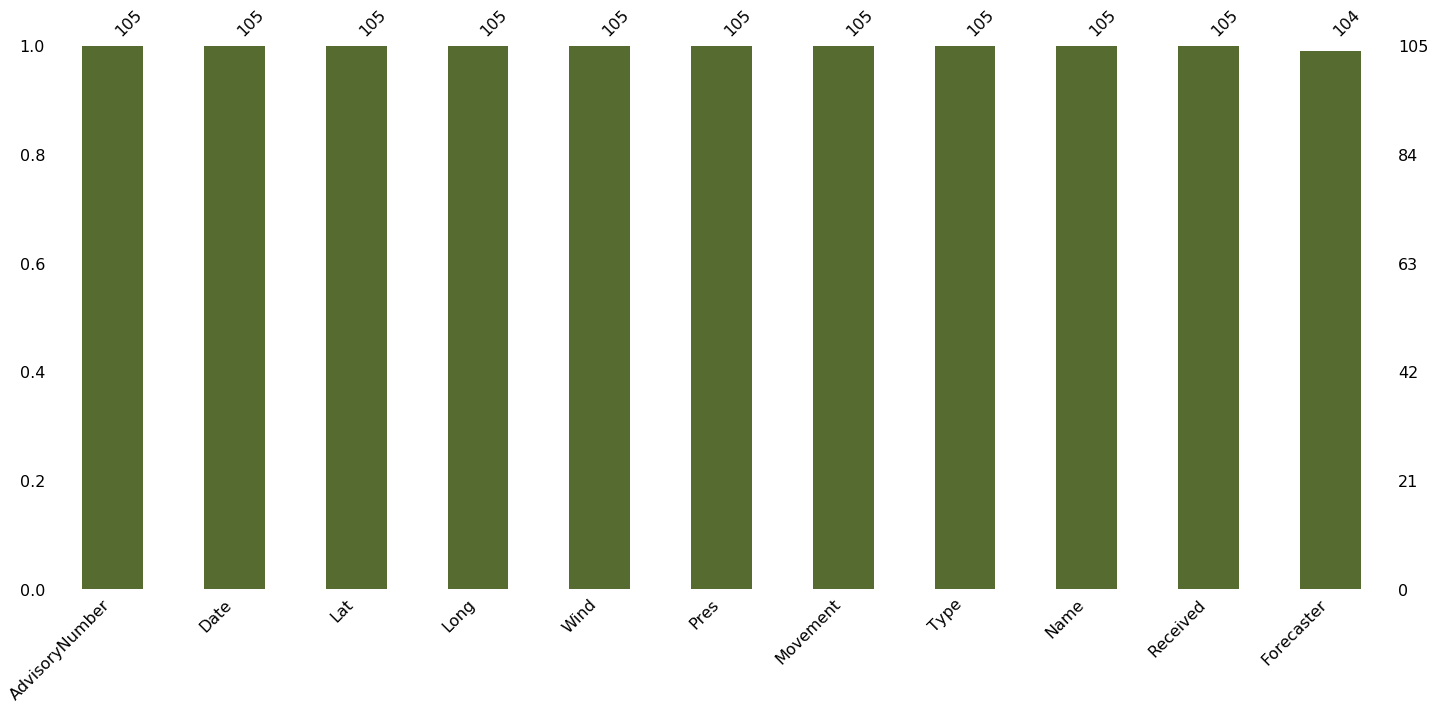

In [13]:
# Notice you can always adjust the color of the visualization
msn.bar(florence, color='darkolivegreen');

In [16]:
# Statistical information
florence.describe()

,Lat,Long,Wind,Pres
count,105.000000,105.000000,105.000000,105.000000
mean,25.931429,56.938095,74.428571,981.571429
std,7.975917,20.878865,36.560765,22.780667
min,12.900000,18.400000,25.000000,939.000000
25%,18.900000,41.000000,40.000000,956.000000
50%,25.100000,60.000000,70.000000,989.000000
75%,33.600000,76.400000,105.000000,1002.000000
max,42.600000,82.900000,140.000000,1008.000000


For most data, you will need to clean up and take only what you need to work on. Here, you only need the time, the coordinates: latitude and longitude, Wind speed, Pressure, and Name. Movement and Type are optional, but the rest could be dropped.

In [17]:
# dropping all unused features:
florence = florence.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


In [18]:
# Add "-" in front of the number to correctly plot the data:
florence['Long'] = 0 - florence['Long']
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


Then you can combine Lattitude and Longitude to create hurricane coordinates, which will subsequently be turned into GeoPoint for visualization purpose.

In [19]:
# Combining Lattitude and Longitude to create hurricane coordinates:
florence['coordinates'] = florence[['Long', 'Lat']].values.tolist()
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-18.4, 12.9]"
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.0, 12.9]"
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.4, 12.9]"
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.4, 13.1]"
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.9, 13.2]"


In [20]:
# Change the coordinates to a geoPoint
florence['coordinates'] = florence['coordinates'].apply(Point)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)


In [21]:
type(florence)

pandas.core.frame.DataFrame

In [22]:
type(florence.coordinates)

pandas.core.series.Series

In [23]:
# Convert the count df to geodf
florence = geopandas.GeoDataFrame(florence, geometry='coordinates')
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)


In [24]:
type(florence)

geopandas.geodataframe.GeoDataFrame

In [25]:
type(florence.coordinates)

geopandas.geoseries.GeoSeries

Notice that even though it's now a Geo DataFrame and Geo Series, it still behaves like a normal DataFrame and a Series. This means you can still perform filtering, groupby for the dataframe or extract the min, max, or mean values of the column.

In [31]:
# Filtering from before the hurricane was named.
florence[florence['Name']=='Six']

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)
5,08/31/2018 02:00,13.4,-21.2,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-21.2 13.4)
6,08/31/2018 05:00,13.6,-21.4,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-21.4 13.6)
7,08/31/2018 08:00,13.7,-21.8,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-21.8 13.7)
8,08/31/2018 11:00,13.7,-22.7,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-22.7 13.7)
9,08/31/2018 14:00,13.8,-23.3,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-23.3 13.8)


In [32]:
# Groupping by name to see how many names it has in the data set:
florence.groupby('Name').Type.count()

Name
FLORENCE     6
Florence    85
SIX          4
Six         10
Name: Type, dtype: int64

In [33]:
print("Mean wind speed of Hurricane Florence is {} mph and it can go up to {} mph maximum".format(round(florence.Wind.mean(),4),
                                                                                         florence.Wind.max()))

Mean wind speed of Hurricane Florence is 74.4286 mph and it can go up to 140 mph maximum


## Visualization

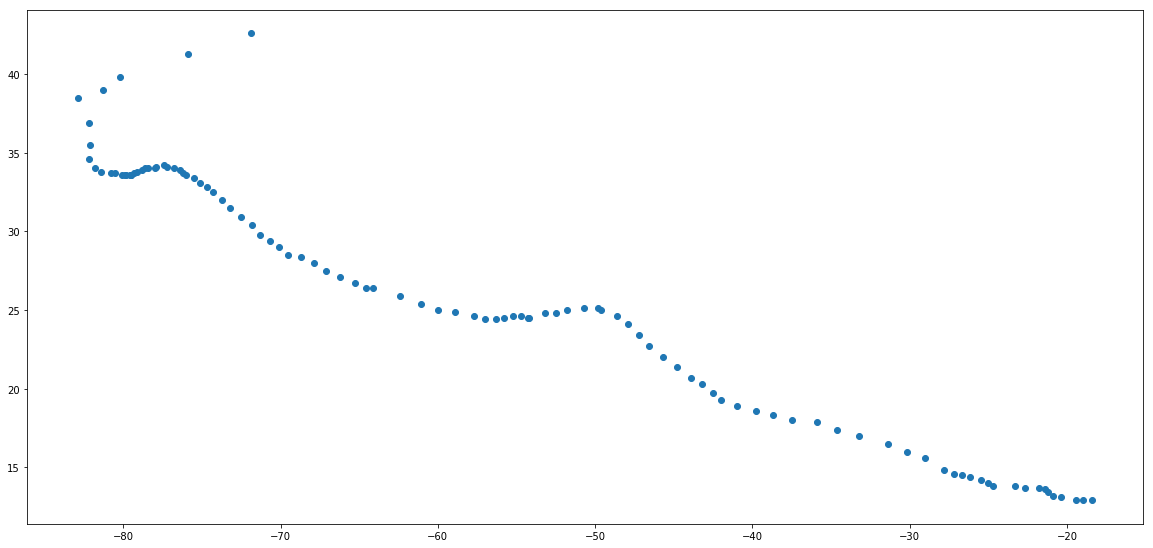

In [34]:
florence.plot(figsize=(20,10));

What happened? All you can see is a bunch of points with no navigation. Is there anything wrong?
No, it's all fine. Because this dataframe only have coordinates information (location) of hurricane Florence at each time point, we can only plot the position on a blank map.

So, the next step is plotting the hurricane position on the US map to see where it hit and how strong it was at that time. To do so, you will use the US map coordinates (data we loaded in the beginning) as the base and plotting hurricane Florence position on top of it.

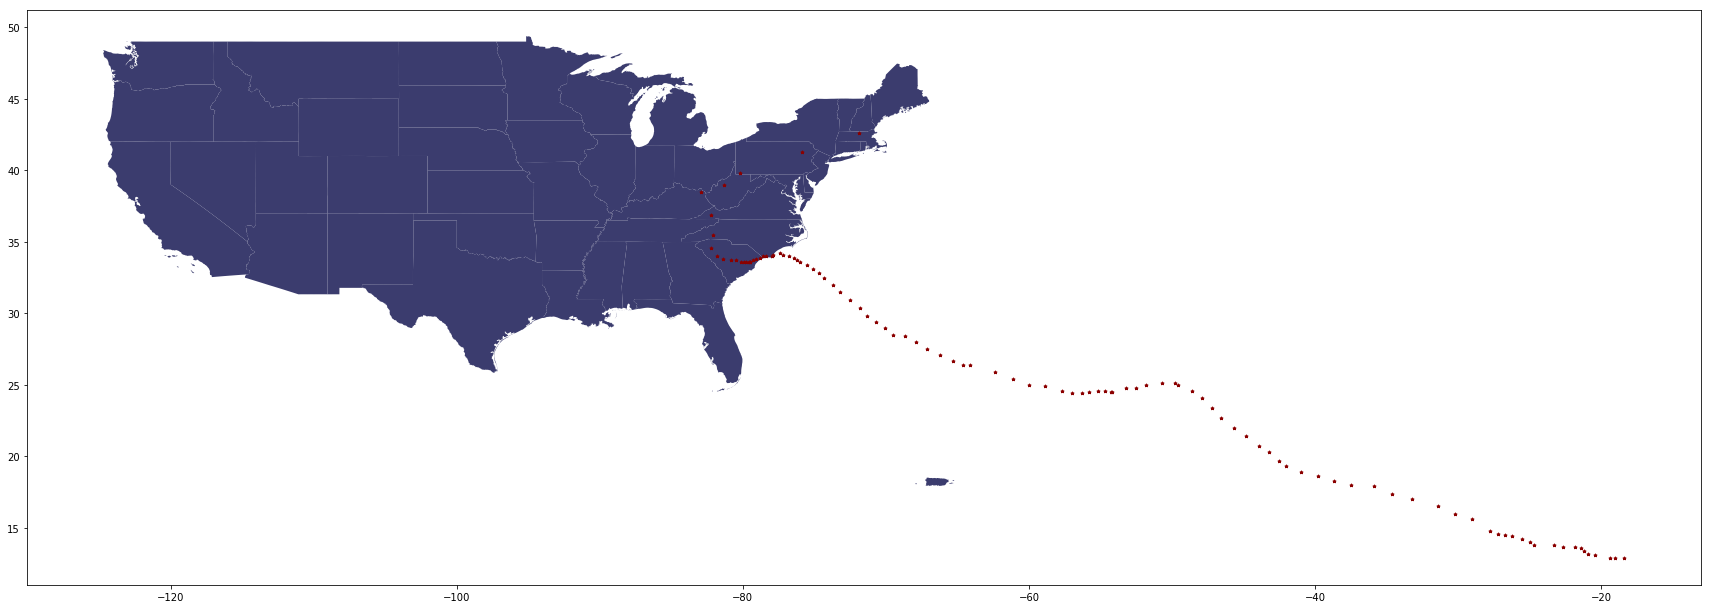

In [35]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')

# plotting the hurricane position on top with red color to stand out:
florence.plot(ax=base, color='darkred', marker="*", markersize=10);

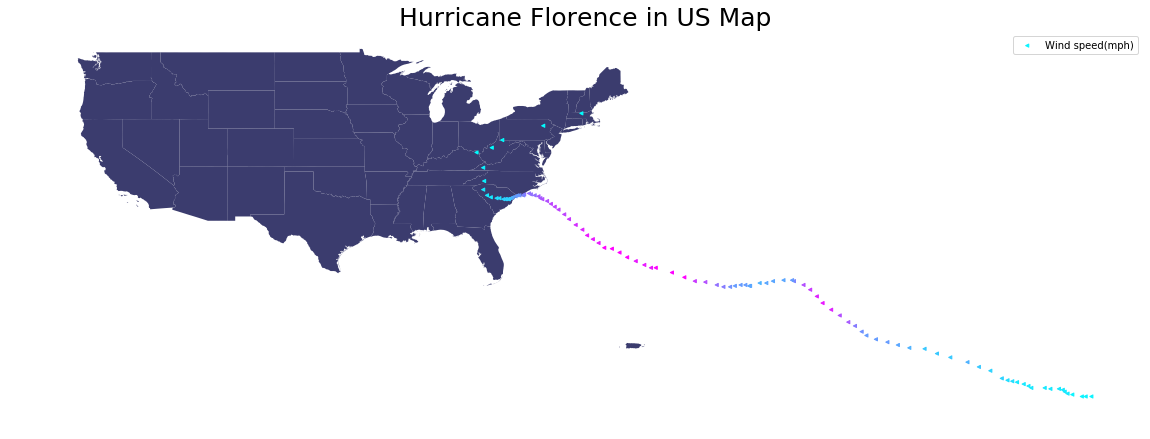

In [36]:
fig, ax = plt.subplots(1, figsize=(20,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')
florence.plot(ax=base, column='Wind', marker="<", markersize=10, cmap='cool', label="Wind speed(mph)")
_ = ax.axis('off')
plt.legend()
ax.set_title("Hurricane Florence in US Map", fontsize=25)
plt.savefig('Hurricane_footage.png',bbox_inches='tight');

So the hurricane was strongest when it's offshore near the east coast. As it approached the land, the hurricane started losing its strength, but at the wind speed in range 60 to 77 miles per hour, it can still make horrible damages.